In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('ggplot')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data, 
                         storage_type_defaults=container_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 67
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 67
  Total cargo volume: 200000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add 

     Station occupancy planned (@ start of year): 0.14155133182109325
     Station occupancy online (@ start of year): 0.14155133182109325
     Number of trains (@start of year): 166.66666666666663
     Horizontal transport online (@ start of year): 15
     Number of STS cranes (@start of year): 12
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add 

     Revenues (demand): 100000000
     Revenues (throughput): 0
     Revenues (demand): 100000000
     Revenues (throughput): 0
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
PV: [-2.59335840e+07 -6.19626560e+07  9.10942000e+07  9.21582216e+07
  9.30951192e+07  8.92198295e+07  2.51254395e+08  2.42074092e+08
  2.88845810e+08  2.90178459e+08]
NPV: 1350023885.6911347


## Report all elements

In [7]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

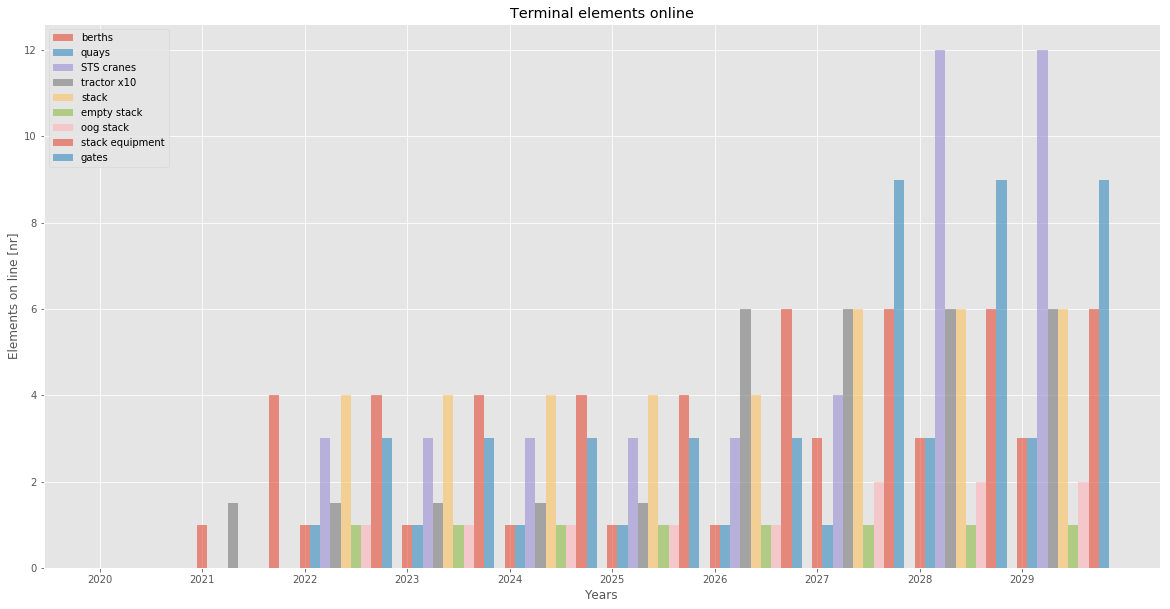

In [8]:
Terminal.terminal_elements_plot()

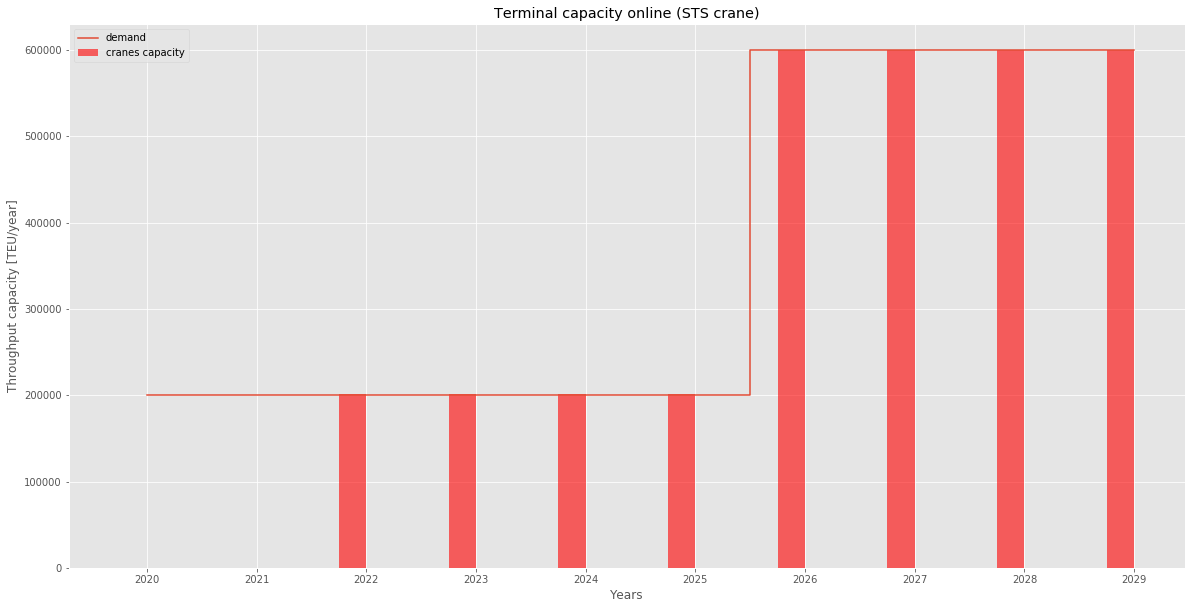

In [9]:
Terminal.terminal_capacity_plot()

In [10]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

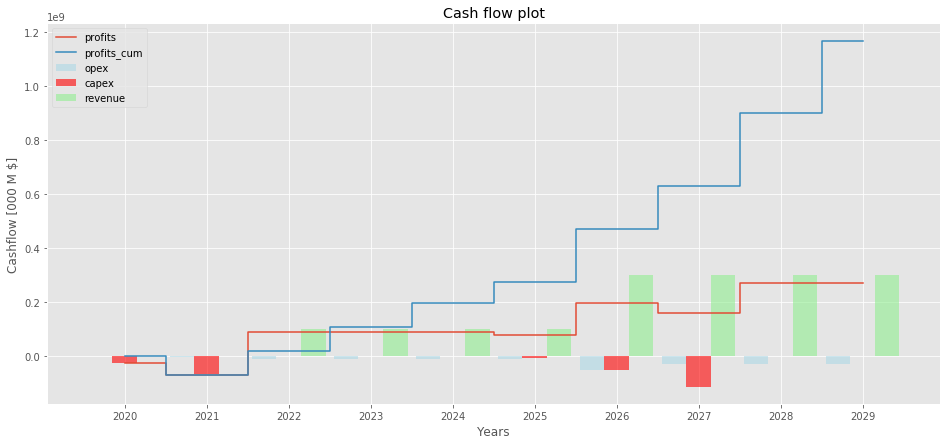

In [11]:
Terminal.cashflow_plot(cash_flows)

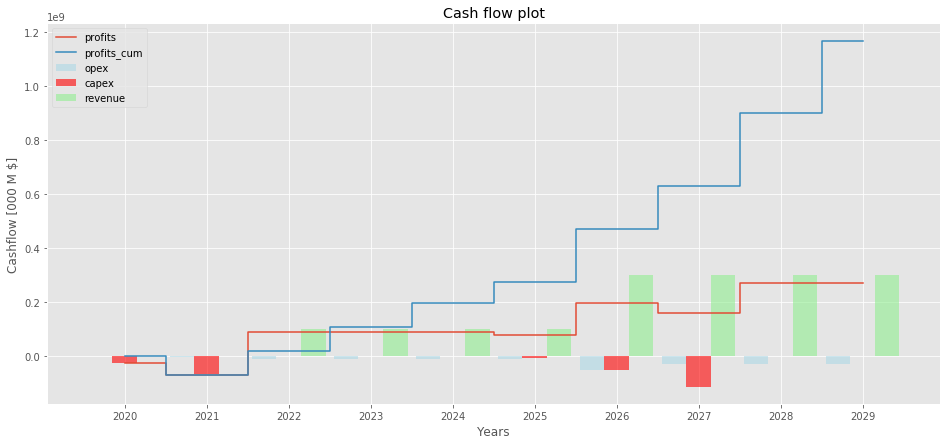

In [12]:

Terminal.cashflow_plot(cash_flows)

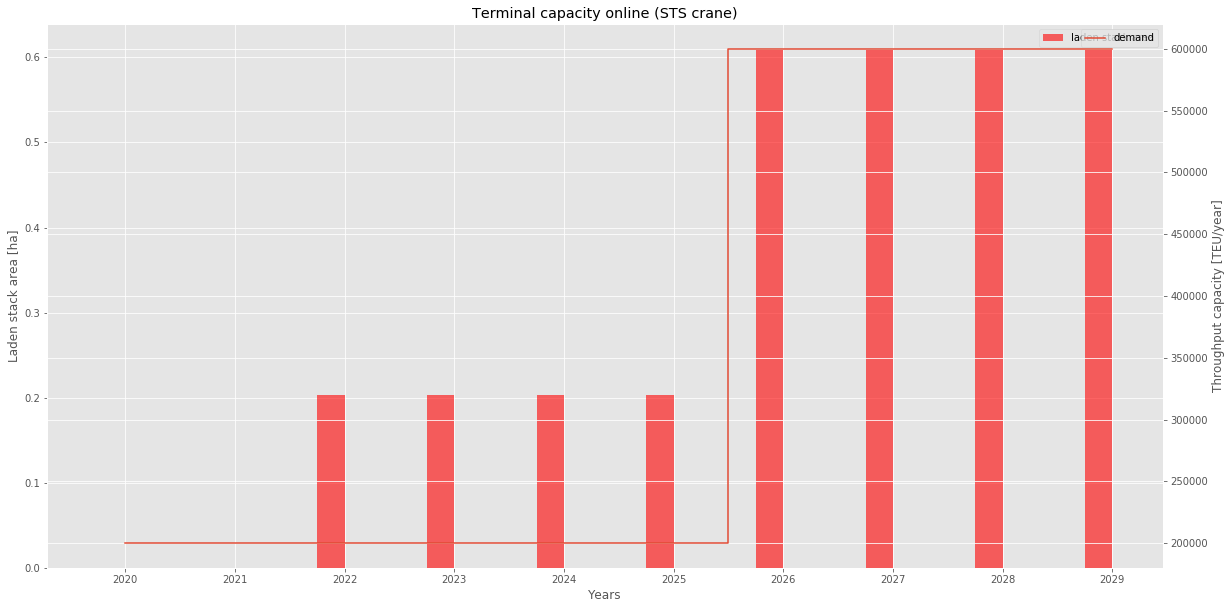

In [13]:
Terminal.laden_stack_area_plot()


## SandBox

In [14]:
Terminal.NPV()

PV: [-2.59335840e+07 -6.19626560e+07  9.10942000e+07  9.21582216e+07
  9.30951192e+07  8.92198295e+07  2.51254395e+08  2.42074092e+08
  2.88845810e+08  2.90178459e+08]
NPV: 1350023885.6911347
